In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
df = pd.read_csv('/content/drive/Shared drives/SIH2020/Dataset/atomdata/datawithoutgroup.csv')
df.head()

,Unnamed: 0,RF,UTC_Start,UTC_Stop,Latitude,Longitude,Altitude (m masl GPS),Speed,Acceleration
0,0,1.0,0.0,10.0,34.630960,-118.107350,799.533333,0.000665,0.000033
1,1,1.0,10.0,20.0,34.630694,-118.113999,842.990000,0.000994,0.000003
2,2,1.0,20.0,30.0,34.630241,-118.123933,918.600000,0.001027,0.000004
3,3,1.0,30.0,40.0,34.629899,-118.134193,980.130000,0.001065,-0.000004
4,4,1.0,40.0,50.0,34.630087,-118.144843,1037.710000,0.001029,0.000003


In [4]:
df.rename(columns={'Altitude (m masl GPS)':'Altitude'},inplace=True)
data = df[['Latitude','Longitude','Altitude']]
data.head(12)

,Latitude,Longitude,Altitude
0,34.630960,-118.107350,799.533333
1,34.630694,-118.113999,842.990000
2,34.630241,-118.123933,918.600000
3,34.629899,-118.134193,980.130000
4,34.630087,-118.144843,1037.710000
5,34.631843,-118.154980,1109.230000
6,34.636051,-118.164650,1168.970000
7,34.642828,-118.171967,1208.790000
8,34.651591,-118.176988,1244.240000
9,34.661533,-118.178686,1272.060000


In [5]:
final = pd.DataFrame()
for i in range(-5,0,1):
  print(i)
  new = data.shift(i,axis=0)
  final = pd.concat([final,new],axis=1)

final = pd.concat([data,final],axis=1)
#new.rename(columns={'Latitude':'Label_Latitude','Longitude':'Label_Longitude','Altitude':'Label_Altitude'},inplace=True)
#new.head()
final.head()

-5
-4
-3
-2
-1


,Latitude,Longitude,Altitude,Latitude,Longitude,Altitude,Latitude,Longitude,Altitude,Latitude,Longitude,Altitude,Latitude,Longitude,Altitude,Latitude,Longitude,Altitude
0,34.630960,-118.107350,799.533333,34.631843,-118.154980,1109.23,34.630087,-118.144843,1037.71,34.629899,-118.134193,980.13,34.630241,-118.123933,918.60,34.630694,-118.113999,842.99
1,34.630694,-118.113999,842.990000,34.636051,-118.164650,1168.97,34.631843,-118.154980,1109.23,34.630087,-118.144843,1037.71,34.629899,-118.134193,980.13,34.630241,-118.123933,918.60
2,34.630241,-118.123933,918.600000,34.642828,-118.171967,1208.79,34.636051,-118.164650,1168.97,34.631843,-118.154980,1109.23,34.630087,-118.144843,1037.71,34.629899,-118.134193,980.13
3,34.629899,-118.134193,980.130000,34.651591,-118.176988,1244.24,34.642828,-118.171967,1208.79,34.636051,-118.164650,1168.97,34.631843,-118.154980,1109.23,34.630087,-118.144843,1037.71
4,34.630087,-118.144843,1037.710000,34.661533,-118.178686,1272.06,34.651591,-118.176988,1244.24,34.642828,-118.171967,1208.79,34.636051,-118.164650,1168.97,34.631843,-118.154980,1109.23


In [6]:
final.shape

(166400, 18)

In [7]:
print(final.shape)
final.dropna(inplace=True)
print(final.shape)

(166400, 18)
(166395, 18)


In [8]:
values = final.values
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values)
X = values[:,:final.shape[1]-3]
Y = values[:,final.shape[1]-3:]

In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1000,shuffle=False)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(165395, 15) (1000, 15) (165395, 3) (1000, 3)


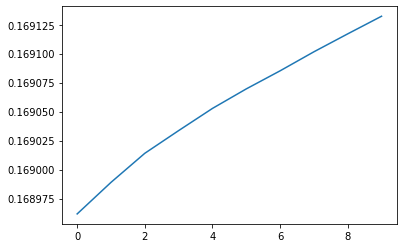

(10, 15)

In [10]:
g = pd.DataFrame(X_test)
z = g.iloc[20:30,1]
t = np.arange(10)
plt.plot(t,z)
plt.show()
X_test[:10].shape

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))


In [12]:
def create_model():
  model = Sequential()
  model.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(3))
  return model


In [12]:
def train_model(filepath):
  model = create_model()
  model.compile(loss='mae', optimizer='adam')
  # fit network
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
  history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_data=(X_test, Y_test), verbose=2, shuffle=False,callbacks=[checkpoint])
  return history

In [14]:
filepath = '/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_timestep.hdf5'

In [13]:

history = train_model(filepath)

Train on 165395 samples, validate on 1000 samples
Epoch 1/30
 - 12s - loss: 0.0265 - val_loss: 0.0184

Epoch 00001: val_loss improved from inf to 0.01838, saving model to /content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_timestep.hdf5
Epoch 2/30
 - 11s - loss: 0.0104 - val_loss: 0.0083

Epoch 00002: val_loss improved from 0.01838 to 0.00835, saving model to /content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_timestep.hdf5
Epoch 3/30
 - 11s - loss: 0.0103 - val_loss: 0.0193

Epoch 00003: val_loss did not improve from 0.00835
Epoch 4/30
 - 11s - loss: 0.0099 - val_loss: 0.0074

Epoch 00004: val_loss improved from 0.00835 to 0.00736, saving model to /content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_timestep.hdf5
Epoch 5/30
 - 11s - loss: 0.0089 - val_loss: 0.0146

Epoch 00005: val_loss did not improve from 0.00736
Epoch 6/30
 - 11s - loss: 0.0085 - val_loss: 0.0061

Epoch 00006: val_loss improved from 0.00736 to 0.00613, saving 

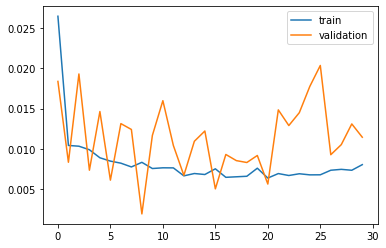

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [15]:
model = create_model()
model.load_weights(filepath)

yhat = model.predict(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[2]))

yhat = np.concatenate((yhat,X_test),axis=1)
inv_yhat = scaler.inverse_transform(yhat)

Y_test = np.concatenate((Y_test,X_test),axis=1)
inv_y = scaler.inverse_transform(Y_test)

d1 = pd.DataFrame(inv_yhat)
d2 = pd.DataFrame(inv_y)

inv_yhat = d1.iloc[:,:3]
inv_y = d2.iloc[:,:3]

# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
#rmse = math.sqrt(mean_squared_error(yhat,Y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22.997


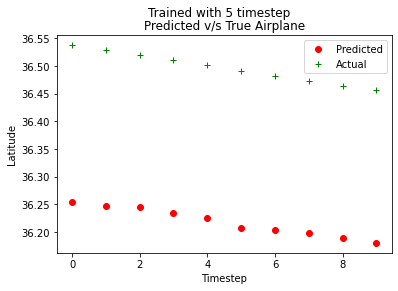

In [16]:
t = np.arange(10)
x_pred = d1.iloc[:10,0]
x_true = d2.iloc[:10,0]
plt.plot(t,x_pred,'ro', label ='Predicted') 
plt.plot(t,x_true,'g+', label ='Actual')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Latitude')
plt.title('Predicted v/s True Airplane')
plt.suptitle('Trained with 5 timestep')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_lat_vs_time.png')
plt.show()

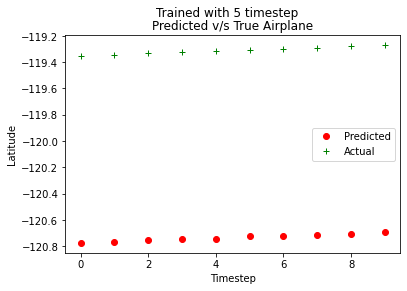

In [21]:
t = np.arange(10)
x_pred = d1.iloc[:10,1]
x_true = d2.iloc[:10,1]
plt.plot(t,x_pred,'ro', label ='Predicted') 
plt.plot(t,x_true,'g+', label ='Actual')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Latitude')
plt.title('Predicted v/s True Airplane')
plt.suptitle('Trained with 5 timestep')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_lon_vs_time.png')
plt.show()

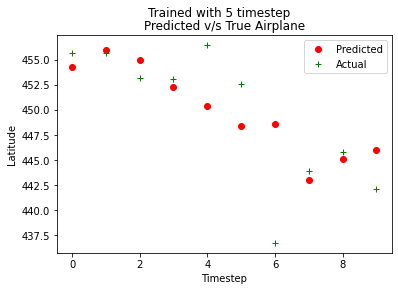

In [22]:
t = np.arange(10)
x_pred = d1.iloc[:10,2]
x_true = d2.iloc[:10,2]
plt.plot(t,x_pred,'ro', label ='Predicted') 
plt.plot(t,x_true,'g+', label ='Actual')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Latitude')
plt.title('Predicted v/s True Airplane')
plt.suptitle('Trained with 5 timestep')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_alt_vs_time.png')
plt.show()

In [19]:
#Trajectory Test
sample = X_test[:10]
print(sample.shape)
result = [sample]
sample = np.reshape(X_test[0],(1,10,3))

for i in range(10):
  sample = model.predict(sample)
  result.append(np.reshape(sample,(10,3)))
  sample = np.reshape(sample,(1,10,3))
  
f = pd.DataFrame(np.array(result))
t = np.arange(11)
plt.plot(t,f[0],'r-', label ='Trajectory Lat') 
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Latitude')
plt.title('Trajectory Latitude')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_traj_time.png')
plt.show()



plt.plot(t,f[1],'b-', label ='Trajectory Lon') 
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Longitude')
plt.title('Trajectory Longitude')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_traj_lon.png')
plt.show()



plt.plot(t,f[2],'g-', label ='Trajectory Alt') 
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Altitude')
plt.title('Trajectory Altitude')
plt.savefig('/content/drive/Shared drives/SIH2020/lstm_airplane_10_timestep/lstm_10_traj_alt.png')
plt.show()







(10, 15)


ValueError: ignored